###### Importing the necessary packages to complete the project

In [129]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import re
import numpy as np
%matplotlib inline

#### Storing the file in a variable

In [130]:
file = 'Desktop/Data Science - Springboard/data_wrangling_json/data/world_bank_projects.json'

##### Read and load file
 - Read and load the file in a new variable, called json_data

In [131]:
# Reading the project dataframe. Saved in a new variable, called json_data

with open(file, 'r') as json_file:
    json_data = json.load(json_file)

##### Understanding the json file
 - To make the file more readable and understable, I looped over the json file, making the keys and values more explicit.


In [132]:
for key, value in json_data[0].items():
    print('{} : {}'.format(key, value))

sector : [{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}]
supplementprojectflg : N
projectfinancialtype : IDA
prodline : PE
mjtheme : ['Human development']
idacommamt : 130000000
impagency : MINISTRY OF EDUCATION
project_name : Ethiopia General Education Quality Improvement Project II
mjthemecode : 8,11
closingdate : 2018-07-07T00:00:00Z
totalcommamt : 130000000
id : P129828
mjsector_namecode : [{'code': 'EX', 'name': 'Education'}, {'code': 'EX', 'name': 'Education'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'EX', 'name': 'Education'}]
docty : Project Information Document,Indigenous Peoples Plan,Project Information Document
sector1 : {'Percent': 46, 'Name': 'Primary education'}
lendinginstr : Investment Project Financing
countrycode : ET
sector2 : {'Percent': 26, 'Name': 'Secondary education'}
totalamt : 130000000
mjtheme_namecode : [{'code': '8',

##### Transforming json file into a dataframe
 - Transformed the json file into a dataframe using pandas, and read the head of the datafrane to understand the main components of the dataframe without going over the whole dataframe table.

In [133]:
wb = pd.read_json(file)
wb.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


### PROJECT FIRST QUESTION - 1. Find the 10 countries with most projects


 - To find the 10 countries with most projects, I sliced the countryname column from the dataframe and counted how many times these countries were mentioned. Thus, giving the total amount of project by each country.
 - Then, I used 'head' to select the top 10 countries

In [134]:
wb_countries_projects = wb['countryname'].value_counts()
wb_project_top = wb_countries_projects.head(10)
print(wb_project_top)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


##### Graph of the top 10 countries with most projects

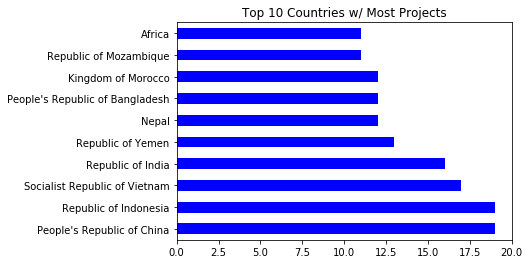

In [148]:
wb_project_top.plot(kind='barh', xlim=([0,20]), title='Top 10 Countries w/ Most Projects', color='b')

### SECOND QUESTION - 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
### THIRD QUESTION - 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

 - Question two depends on the third question to be completed. For this reason, I will first answer the third question first and then the second.


#### Getting the data inside a cell
 - I used json_normalize to get the data inside the cell and created a new dataframe, called major_project.
 - This new dataframe will allow us to see what are the top major project themes.

In [136]:
major_project = json_normalize(json_data, 'mjtheme_namecode', ['countryname', 'countrycode'])
major_project.head()

,code,name,countryname,countrycode
0,8,Human development,Federal Democratic Republic of Ethiopia,ET
1,11,,Federal Democratic Republic of Ethiopia,ET
2,1,Economic management,Republic of Tunisia,TN
3,6,Social protection and risk management,Republic of Tunisia,TN
4,5,Trade and integration,Tuvalu,TV


#### Analyzing new dataframe (major_project)
 - By using 'info', we can see the structure of the dataframe. 
 - Interesting to observe that all columns have been identified as object and none of them have missing values. And, as we can see on the table above, the column 'name' has a missing value.

In [137]:
major_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code           1499 non-null object
name           1499 non-null object
countryname    1499 non-null object
countrycode    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB


#### Filling missing values
 - Since each project theme name correspond to a code, I will first organize the code column.
     - To organize the code column, I will transform the values of the column into integers.
     - After making it an integer, I will sort from lowest to highest.

In [138]:
major_project['code'] = major_project['code'].astype(int)
major_project = major_project.sort_values('code')
major_project.head()

,code,name,countryname,countrycode
1114,1,,Republic of Honduras,HN
647,1,Economic management,Lao People's Democratic Republic,LA
1260,1,Economic management,Hashemite Kingdom of Jordan,JO
648,1,Economic management,Lao People's Democratic Republic,LA
1437,1,,Republic of Guatemala,GT


#### Filling the NaN with values
 - To fill the empty cells with values, Im going I used the back fill, which fill the empty cell with the previous value in the column.     
 - However, to use the back fill, the empyt cells need to be NaN and right now they are empty strings. So, I replaced the empty strings with NaN and then used the back fill.


In [139]:
major_project['name'] = major_project['name'].replace('', np.nan)
major_project['name'] = major_project['name'].fillna(method='bfill')

#### Issues with back fill
 - The back fill method uses the previous cell to fill the empty cell. Therefore, it can fill the cell in the 'name' column with the wrong project theme.
 - Since each code should represent only one project name, I decided to pivot the table with code and name column as the index, if code has two rows, it means that the one of the row has been filled up incorrectly.

In [140]:
wb_pivoted = pd.pivot_table(major_project, values='countrycode', index=['code','name'], columns='countryname', aggfunc='count')
wb_pivoted

countryname                                        Africa  \
code name                                                   
1    Economic management                              NaN   
2    Public sector governance                         2.0   
3    Rule of law                                      NaN   
4    Financial and private sector development         5.0   
5    Trade and integration                           10.0   
6    Social protection and risk management            NaN   
7    Human development                                NaN   
     Social dev/gender/inclusion                      2.0   
8    Human development                                2.0   
9    Urban development                                2.0   
10   Rural development                                6.0   
11   Environment and natural resources management    10.0   

countryname                                        Antigua and Barbuda  \
code name                                                                
1    Economic management                                           NaN   
2    Public sector governance                                      1.0   
3    Rule of law                                                   NaN   
4    Financial and private sector development                      NaN   
5    Trade and integration                                         NaN   
6    Social protection and risk management                         3.0   
7    Human development                                             NaN   
     Social dev/gender/inclusion                                   NaN   
8    Human development                                             NaN   
9    Urban development                                             NaN   
10   Rural development                                             NaN   
11   Environment and natural resources management                  NaN   

countryname                                        Arab Republic of Egypt  \
code name                                                                   
1    Economic management                                              NaN   
2    Public sector governance                                         NaN   
3    Rule of law                                                      NaN   
4    Financial and private sector development                         1.0   
5    Trade and integration                                            NaN   
6    Social protection and risk management                            NaN   
7    Human development                                                NaN   
     Social dev/gender/inclusion                                      1.0   
8    Human development                                                1.0   
9    Urban development                                                NaN   
10   Rural development                                                1.0   
11   Environment and natural resources management                     NaN   

countryname                                        Argentine Republic  \
code name                                                               
1    Economic management                                          NaN   
2    Public sector governance                                     NaN   
3    Rule of law                                                  NaN   
4    Financial and private sector development                     1.0   
5    Trade and integration                                        NaN   
6    Social protection and risk management                        1.0   
7    Human development                                            NaN   
     Social dev/gender/inclusion                                  NaN   
8    Human development                                            NaN   
9    Urban development                                            NaN   
10   Rural development                                            NaN   
11   Environment and natural resources management                 5.0   

countr

##### Finding code with incorrect values
 - As mentioned above, if a code has two rows, one of the row has the wrong info. Since each code corresponds to one Theme name.
 - To find the incorrect value, I looped through the code and analyze how many rows there are. If the code has more than one row, the code will be stored with the theme names.

In [149]:
wrong_back_fill = {}
for value in wb_pivoted.index.get_level_values('code'):
    df = wb_pivoted.xs(value, level='code')
    
    if len(df.index.get_level_values('name')) > 1:
        wrong_back_fill[value] = df.index.get_level_values('name')
        #print('{} : {}'.format('code', value))
        
wrong_back_fill        

{7: Index(['Human development', 'Social dev/gender/inclusion'], dtype='object', name='name')}

##### Fixing code with incorrect value
 - There was only one incorrect value, code 7. 
 - To fix it, I looked at the table to the code after and before 7 and found that Human Development was incorrect placed as it pertains to code 8. 
 - Changed the name to code 7 theme name, Social dev/gender/inclusion

In [150]:
major_project.loc[(major_project['name'] == 'Human development') & (major_project['code'] == 7), 'name'] = 'Social dev/gender/inclusion'

## Question three (Answered) - major_project has no more missing values on Theme Names.

In [152]:
major_project.head()

,code,name,countryname,countrycode
1114,1,Economic management,Republic of Honduras,HN
647,1,Economic management,Lao People's Democratic Republic,LA
1260,1,Economic management,Hashemite Kingdom of Jordan,JO
648,1,Economic management,Lao People's Democratic Republic,LA
1437,1,Economic management,Republic of Guatemala,GT


### Question two (Answered) - Top 10 major themes
 - With no missing values, we can answer the second question just like the first question.
     - Loop through the project names and count how many times there are mentioned in the table

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64


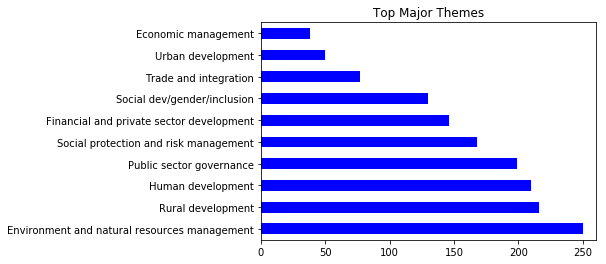

In [155]:
top_major_themes = major_project['name'].value_counts().head(10)
print(top_major_themes)
top_major_themes.plot(kind='barh', xlim=([0,260]), title='Top Major Themes', color='b')

#### Extra exercise (Curiosity) - I created a table to identify the countries with most project theme proposals

Republic of Indonesia              56
Republic of India                  51
Socialist Republic of Vietnam      43
Federative Republic of Brazil      41
People's Republic of Bangladesh    41
People's Republic of China         40
Africa                             39
Republic of Yemen                  34
Kingdom of Morocco                 32
Republic of Mozambique             31
Name: countryname, dtype: int64


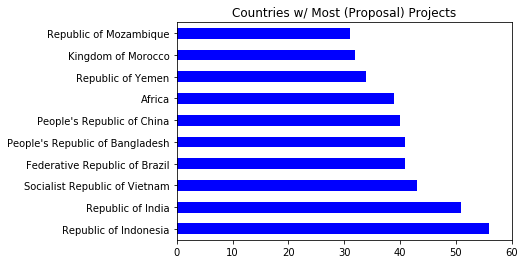

In [147]:
top_major_project = major_project['countryname'].value_counts().head(10)
print(top_major_project)

top_major_project.plot(kind='barh', xlim=([0,60]), title='Countries w/ Most (Proposal) Projects', color='b')